# Text Analytics

<h3>HAM</h3>

<h4>Import Libraries</h4> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<h4>Import the text dataset (spam)</h4>

In [2]:
ham = pd.read_csv('ham.txt', delimiter = '\t', quoting = 3, encoding = "ISO-8859-1") #    Ignoring " with quoting = 3
ham.head()

,text
0,"""Go until jurong point, crazy.. Available only..."
1,Ok lar... Joking wif u oni...
2,U dun say so early hor... U c already then say...
3,"""Nah I don't think he goes to usf, he lives ar..."
4,Even my brother is not like to speak with me. ...


In [3]:
ham.shape

(4827, 1)

In [4]:
import re 
import nltk
#   nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 4827):
    feedback = re.sub('[^a-zA-Z]', ' ', spam['text'][i]) #   Keeping texts only
    feedback = feedback.lower() #   All Lowercase
    feedback = feedback.split() #   Creating list of review words
    ps = PorterStemmer()
    # Remove stopwords & Stemming (Keeping root word only )
    feedback = [ps.stem(word) for word in feedback if not word in set(stopwords.words('english'))]
    feedback = ' '.join(feedback)
    corpus.append(feedback)

In [8]:
print(corpus[0:15])

['free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free', 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'xxxmobilemovieclub use credit click wap link next txt messag click http wap xxxmobilemovieclub com n qjkgighjjgcbl', 'england v macedonia dont miss goal team news txt ur nation team eg england tri wale scotland txt poboxox w wq', 'thank subscript rington uk mobil charg month pleas confirm repli ye repli charg', 'rodger burn msg tri call repli sm free nokia mobil free camcord pleas call deliveri tomorrow', 'sm ac sptv new jersey devil detroit red wing 

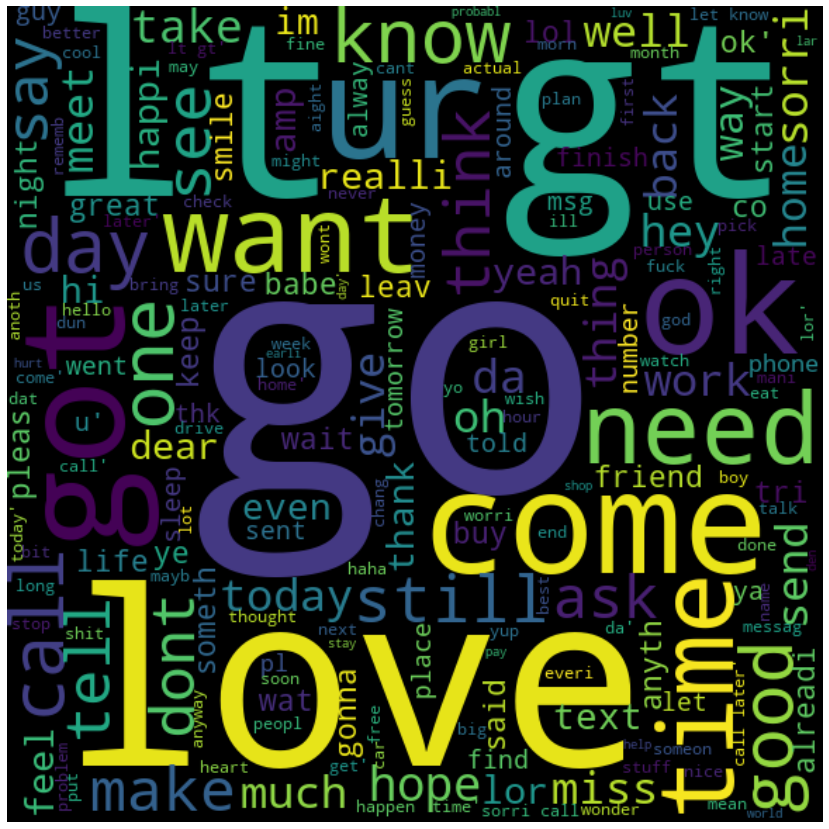

In [5]:
#!pip install wordcloud
from wordcloud import WordCloud
corpus = str(corpus)
wordcloud = WordCloud(width=580, height=580, margin=0).generate(corpus)

# Display the generated image:
plt.figure(figsize=[25,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

<h3>Import and Tokenize</h3>

In [17]:
#Read the base file into a raw text variable
import os
import nltk
base_file = open(os.getcwd()+ "/ham.txt", 'rt')
raw_text = base_file.read()
base_file.close()

#Extract tokens
token_list = nltk.word_tokenize(raw_text)
print("Token List : ", token_list[:20])
print("\n Total Tokens : ", len(token_list))

Token List :  ['text', "''", 'Go', 'until', 'jurong', 'point', ',', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine']

 Total Tokens :  85882


<h3>Removing Punctuation</h3>

In [18]:
#Use the punkt library to extracr tokens
token_list2 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list))
print("Token List after removing the punctuation: ", token_list2[:20])
print("\n Total Tokens after removing the punctuation : ", len(token_list2))

Token List after removing the punctuation:  ['text', 'Go', 'until', 'jurong', 'point', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'there', 'got', 'amore']

 Total Tokens after removing the punctuation :  70580


<h3>Remove Stopwords</h3>

In [19]:
#Download the standard stopword list
#nltk.download('stopwords')
from nltk.corpus import stopwords

#Remove stopwords
corpus1 = list(filter(lambda token: token not in stopwords.words('english'), token_list2))
print("Token list after stopword removal: ", corpus[:20])
print("\nTotal tokens after stopword removal : ", len(corpus))

Token list after stopword removal:  ['text', 'Go', 'jurong', 'point', 'crazy..', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'got', 'amore', 'wat', 'Ok', 'lar', 'Joking']

Total tokens after stopword removal :  47096


<h3>Final Word Count</h3>

In [20]:
from collections import Counter
freq = Counter(corpus1).most_common(250)
print(freq)

[('I', 1932), ('u', 724), ("'s", 428), ("'m", 392), ("n't", 357), ('gt', 318), ('lt', 316), ('2', 313), ('get', 290), ('U', 266), ('go', 231), ("'ll", 229), ('know', 228), ('like', 221), ('got', 213), ('come', 208), ('You', 207), ('call', 205), ('ur', 191), ('4', 178), ('time', 171), ('day', 168), ('lor', 156), ('home', 153), ('want', 152), ('going', 152), ('How', 152), ('one', 150), ('good', 146), ('need', 144), ('No', 138), ('But', 137), ('n', 136), ('love', 133), ('Ok', 132), ('still', 132), ('da', 130), ('later', 126), ('Do', 124), ('back', 120), ('So', 119), ('ü', 119), ('If', 119), ('What', 118), ('think', 116), ('see', 116), ('Sorry', 111), ('It', 110), ('send', 106), ('We', 104), ('today', 102), ('much', 102), ('r', 101), ('My', 100), ('way', 99), ('And', 99), ('ok', 97), ('dont', 97), ('night', 96), ('tell', 93), ('na', 92), ('take', 91), ('Hey', 91), ('Just', 89), ('amp', 88), ("'re", 87), ('work', 87), ('already', 86), ('A', 85), ('ask', 85), ('give', 85), ('say', 83), ("'ve